# РТ5-61Б

Номер варианта - 1

Номер задачи - 1

Номер набора данных, указанного в задаче - 1 (Ирисы из scikit-learn)

## Задача №1.

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

## Примечания:
* Если в Вашем наборе данных отсутствуют данные, необходимые для решения задачи, создайте их искусственно. Например, если отсутствуют категориальные признаки, создайте категориальный признак на основе числового. Если отсутствуют пропуски, замените на пропуски часть значений в одном или нескольких признаках.
* Также Вы можете дополнительно использовать датасеты, содержащие необходимые данные, например использовать дополнительный датасет, содержащий пропуски.

## Дополнительные требования по группам:
Для пары произвольных колонок данных построить график "Jointplot"

In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install numpy
# !pip install seaborn

In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names) 
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
data_df["target"] = data.target
data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

Пропусков в датасете нет, поэтому создадим их искусственно.

In [7]:
features_with_missing = data.data.copy()
random_indices = np.random.choice(features_with_missing.shape[0], 6, replace=False)
random_features = np.random.choice(features_with_missing.shape[1], 2, replace=False)
for idx in random_indices:
    for feature in random_features:
        features_with_missing[idx, feature] = np.nan
data.data = features_with_missing

In [8]:
data_df_miss = pd.DataFrame(data = data.data,
                       columns = data.feature_names) 
data_df_miss

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
data_df_miss["target"] = data.target
data_df_miss

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
data_df_miss.isnull().sum()

sepal length (cm)    0
sepal width (cm)     6
petal length (cm)    0
petal width (cm)     6
target               0
dtype: int64

In [11]:
data_new = data_df_miss.dropna(axis=0, how='any')
data_new.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
data_new.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.123663,0.870709,0.819186,0.784080
sepal width (cm),-0.123663,1.000000,-0.434126,-0.370687,-0.430349
petal length (cm),0.870709,-0.434126,1.000000,0.963322,0.948979
petal width (cm),0.819186,-0.370687,0.963322,1.000000,0.956956
target,0.784080,-0.430349,0.948979,0.956956,1.000000


Как видим: 

* Длина чашелистника
  
    * очень слабо связана с шириной чашелистника (зависимость отрицельная), причем можно считать их независимыми;
      
    * сильно связана (положительной зависимостью) с длиной лепестка и шириной лепестка;
 
* Ширина чашелистника:

    * слабо связана с размерами лепестка (зависимость причем отрицательная)
 
* На target влияют длина чашелистника, размеры лепестка.

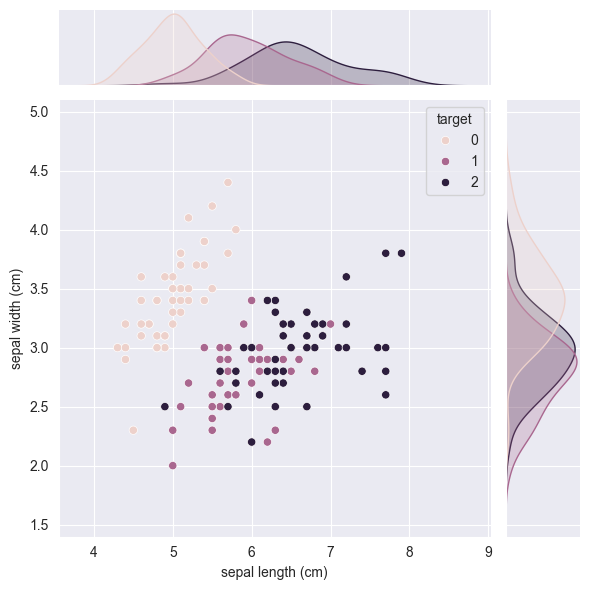

In [13]:
sns.jointplot(x="sepal length (cm)", y="sepal width (cm)", data=data_new, hue=data_new['target'])

Датасет подходит для классификации - предсказания вида ириса.

В модель наиболее сильно будут вкладывать длина чашелистника и размеры лепестка.